In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv("diabetes.csv")

In [12]:
print(data.head())
print(data.tail())
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [13]:
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

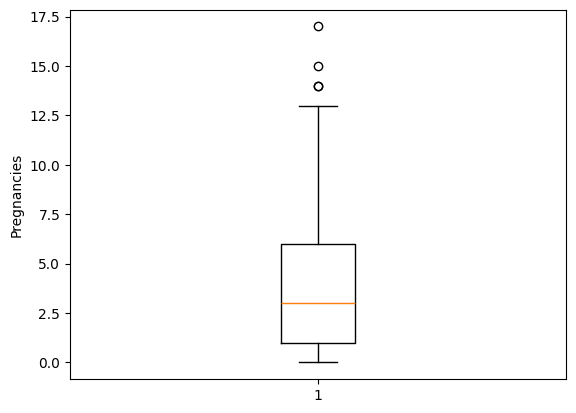

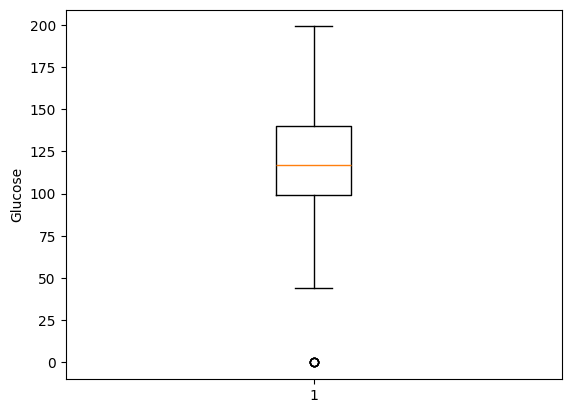

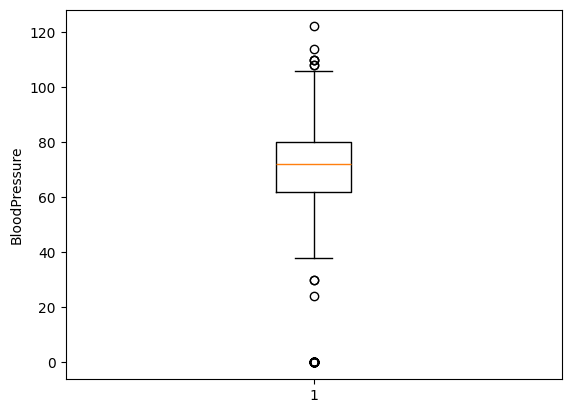

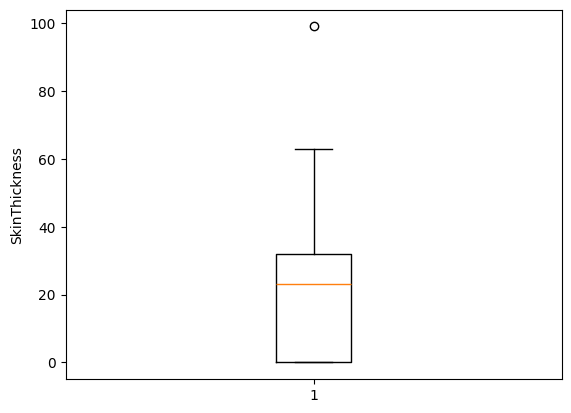

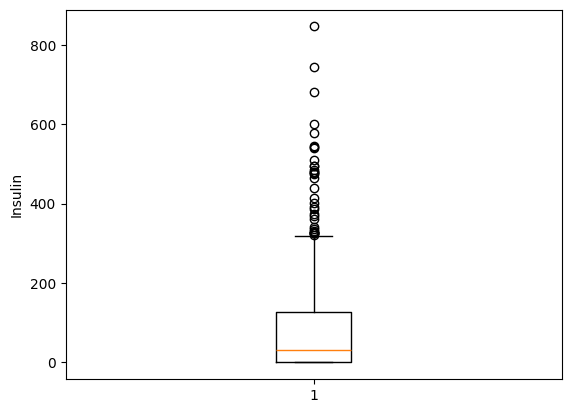

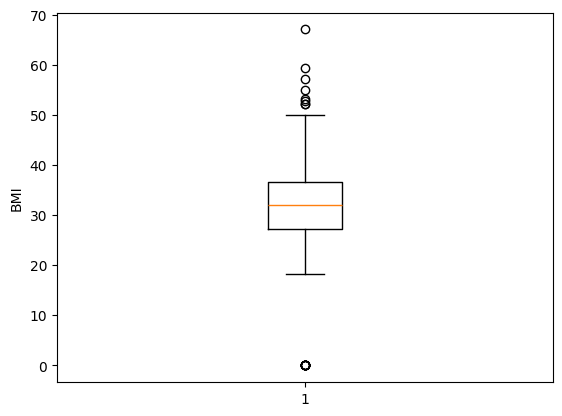

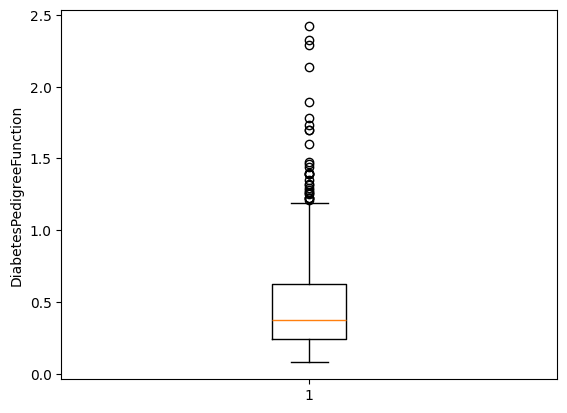

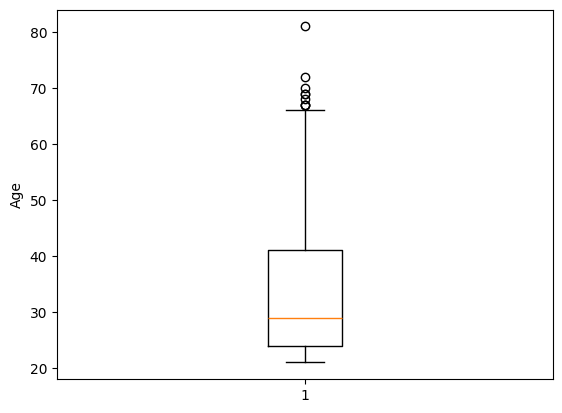

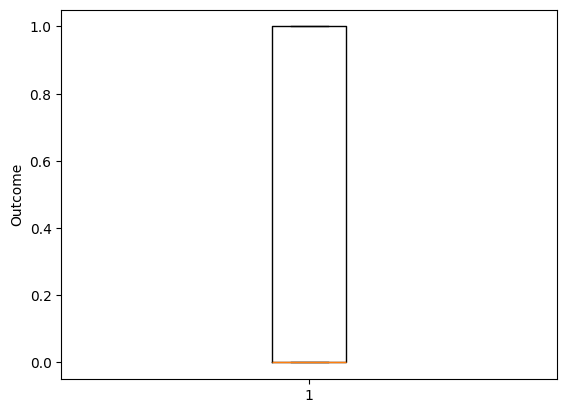

In [14]:

for x in data.columns:
    plt.boxplot(data[x])
    plt.ylabel(x)
    plt.show()

In [15]:
from sklearn.impute import SimpleImputer
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction','BMI']
data[cols] = data[cols].replace(0, np.nan)
imputer = SimpleImputer(strategy='mean')
data[cols] = imputer.fit_transform(data[cols])


In [16]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Text(0.5, 1.0, 'Is person diabetic ?')

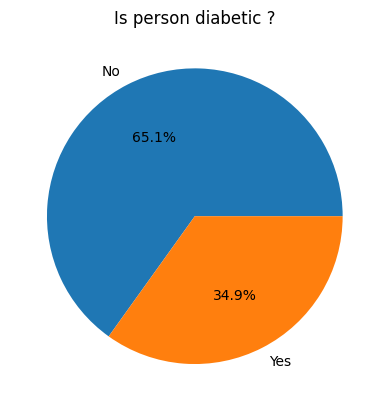

In [7]:
# how balanced our classes are?

classes_count = data["Outcome"].value_counts()

plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is person diabetic ?")

<Axes: >

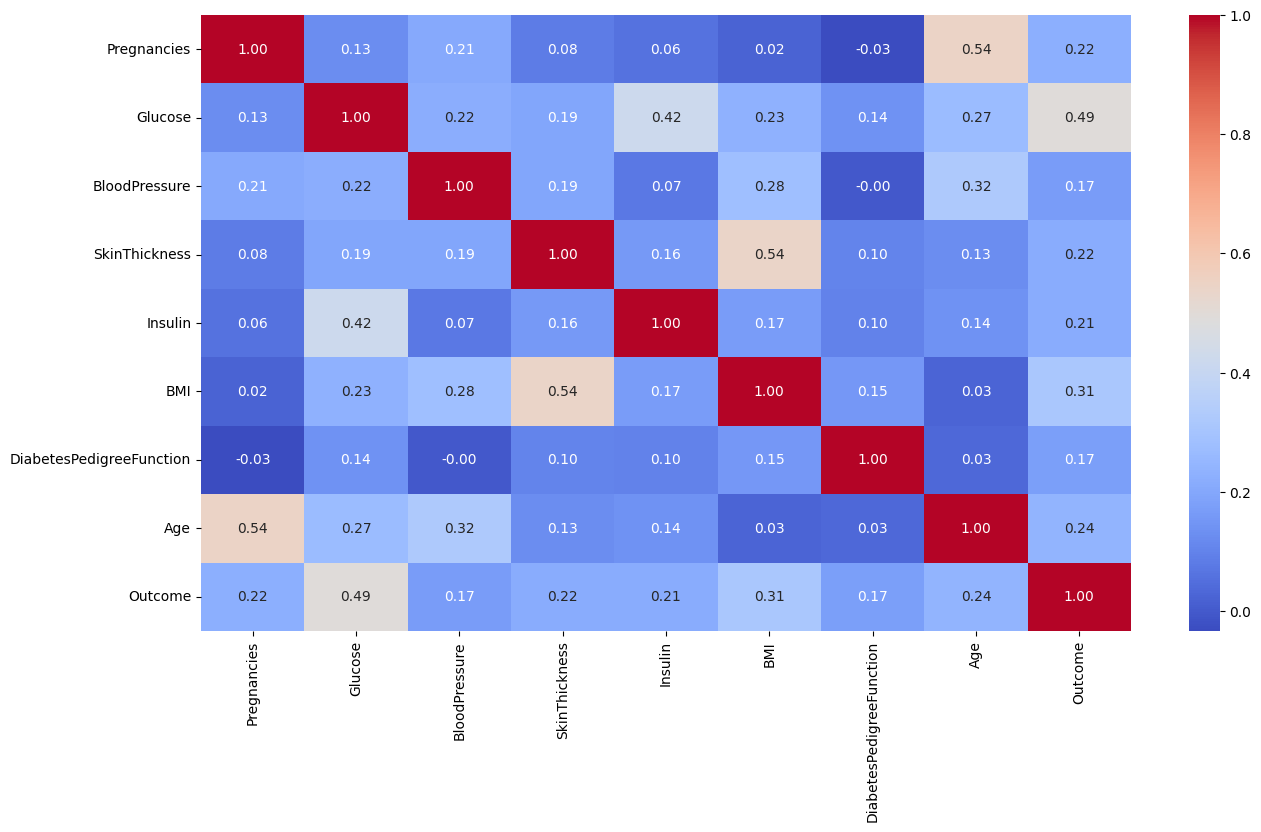

In [17]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [9]:
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [32]:
# DT classifier
# Decision Tree Model - no pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)
# Evaluation
print("Decision Tree Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Decision Tree Model
Precision:  0.603448275862069
Recall:  0.6363636363636364
F1 score:  0.6194690265486725
Accuracy:  0.7207792207792207
CM:  [[76 23]
 [20 35]]


In [26]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)
    print(f"for depth={depth}, accuracy={acc}\t recall={recall}")

for depth=2, accuracy=0.7727272727272727	 recall=0.5818181818181818
for depth=3, accuracy=0.7597402597402597	 recall=0.6181818181818182
for depth=4, accuracy=0.7142857142857143	 recall=0.7272727272727273
for depth=5, accuracy=0.7207792207792207	 recall=0.7636363636363637
for depth=6, accuracy=0.7272727272727273	 recall=0.7272727272727273
for depth=7, accuracy=0.7272727272727273	 recall=0.7272727272727273
for depth=8, accuracy=0.7337662337662337	 recall=0.6545454545454545
for depth=9, accuracy=0.7467532467532467	 recall=0.7090909090909091
for depth=10, accuracy=0.7207792207792207	 recall=0.6545454545454545


In [30]:
min_samples_splits = [5, 10, 15, 20, 25, 30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=5,min_samples_split=split)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)
    print(f"for split={split}, accuracy={acc}\t recall={recall}")
    

for split=5, accuracy=0.7207792207792207	 recall=0.7636363636363637
for split=10, accuracy=0.7207792207792207	 recall=0.7636363636363637
for split=15, accuracy=0.7272727272727273	 recall=0.7636363636363637
for split=20, accuracy=0.7272727272727273	 recall=0.7636363636363637
for split=25, accuracy=0.7207792207792207	 recall=0.7272727272727273
for split=30, accuracy=0.7077922077922078	 recall=0.7636363636363637


In [31]:
# with pruning
model = DecisionTreeClassifier(max_depth=5,min_samples_split=15)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Precision:  0.5915492957746479
Recall:  0.7636363636363637
F1 score:  0.6666666666666666
Accuracy:  0.7272727272727273
CM:  [[70 29]
 [13 42]]


In [33]:
# post pruning
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
path = full_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.00106603 0.001396   0.0014477  0.0014477  0.00145723
 0.0014806  0.00153818 0.00154595 0.00156219 0.00161498 0.00202179
 0.0020229  0.00207285 0.00217155 0.00217155 0.00217155 0.00227785
 0.00231062 0.00236897 0.00240014 0.002443   0.00253348 0.00265712
 0.00271444 0.00276614 0.002792   0.00282302 0.00285243 0.00290808
 0.00291445 0.00297817 0.00307637 0.00329673 0.00347119 0.00352877
 0.00366368 0.00370907 0.00381337 0.00386931 0.00394305 0.00442207
 0.00443359 0.00607942 0.00613102 0.00689647 0.00826586 0.0096877
 0.01018655 0.01598316 0.01627998 0.02311097 0.02322126 0.08048715]


In [38]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(x_train, y_train)

    trees.append((model, alpha))
best_recall = 0
best_alpha = 0

for model, alpha in trees:
    y_pred=model.predict(x_test)
    curr_recall = recall_score(y_test, y_pred)
    if curr_recall > best_recall:
        best_recall = curr_recall
        best_alpha = alpha
best_alpha

np.float64(0.00689646943718604)

In [41]:
# best DT post pruning
best_model = DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha,max_depth=5,min_samples_split=15)
best_model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Precision:  0.0
Recall:  0.0
F1 score:  0.0
Accuracy:  0.6428571428571429
CM:  [[99  0]
 [55  0]]


C:\Users\lokes\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [44]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators=100 means we build 100 trees
# max_depth=5 keeps them from overfitting (similar to your pruning)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_model.fit(x_train, y_train) # You can use the raw X_train, scaling isn't needed for Trees!
y_pred_rf = rf_model.predict(x_test)

print("--- Random Forest Results ---")
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("CM: \n", confusion_matrix(y_test, y_pred_rf))

--- Random Forest Results ---
Precision:  0.68
Recall:  0.6181818181818182
Accuracy:  0.7597402597402597
CM: 
 [[83 16]
 [21 34]]


In [47]:
# class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(x_train, y_train)
y_pred_bal = rf_balanced.predict(x_test)

print("--- Balanced Random Forest Results ---")
print("Precision: ", precision_score(y_test, y_pred_bal))
print("Recall: ", recall_score(y_test, y_pred_bal))
print("Accuracy: ", accuracy_score(y_test, y_pred_bal))
print("CM: \n", confusion_matrix(y_test, y_pred_bal))

--- Balanced Random Forest Results ---
Precision:  0.625
Recall:  0.8181818181818182
Accuracy:  0.7597402597402597
CM: 
 [[72 27]
 [10 45]]


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting is very sensitive to parameters.
# learning_rate: Lower is better, but requires more trees (n_estimators)
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

print("--- Gradient Boosting Results ---")
print("Precision: ", precision_score(y_test, y_pred_gb))
print("Recall: ", recall_score(y_test, y_pred_gb))
print("Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("CM: \n", confusion_matrix(y_test, y_pred_gb))

--- Gradient Boosting Results ---
Precision:  0.625
Recall:  0.7272727272727273
Accuracy:  0.7467532467532467
CM: 
 [[75 24]
 [15 40]]


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [53]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression(class_weight='balanced')
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.5735294117647058
Recall:  0.7090909090909091
F1 score:  0.6341463414634146
Accuracy:  0.7077922077922078
CM:  [[70 29]
 [16 39]]


In [80]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.660377358490566
Recall:  0.6363636363636364
F1 score:  0.6481481481481481
Accuracy:  0.7532467532467533
CM:  [[81 18]
 [20 35]]


In [81]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

y_pred = nb_model.predict(x_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.6379310344827587
Recall:  0.6727272727272727
F1 score:  0.6548672566371682
Accuracy:  0.7467532467532467
CM:  [[78 21]
 [18 37]]


In [85]:
# 1. Select only the strong features
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
X_clean = data[selected_features]
y = data['Outcome']

# 2. Split 
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y, test_size=0.2, random_state=42)

# 3. Scale 
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# 4. Retrain KNN 
knn_clean = KNeighborsClassifier(n_neighbors=21) 
knn_clean.fit(X_train_c_scaled, y_train_c)
y_pred_clean = knn_clean.predict(X_test_c_scaled)

# 5. Check Results
print("--- Results with ONLY Top 4 Features ---")
print("New Accuracy:", accuracy_score(y_test_c, y_pred_clean))
print("New Recall:", recall_score(y_test_c, y_pred_clean, pos_label=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_clean))

--- Results with ONLY Top 4 Features ---
New Accuracy: 0.7532467532467533
New Recall: 0.6545454545454545

Confusion Matrix:
 [[80 19]
 [19 36]]


In [67]:
# Add or Tranform features
data["Glucose_sq"] = data["Glucose"] ** 2


X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.6666666666666666
Recall:  0.6181818181818182
F1 score:  0.6415094339622641
Accuracy:  0.7532467532467533
CM:  [[82 17]
 [21 34]]


In [71]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.6031746031746031
Recall:  0.6909090909090909
F1 score:  0.6440677966101694
Accuracy:  0.7272727272727273
CM:  [[74 25]
 [17 38]]


In [70]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.6491228070175439
Recall:  0.6727272727272727
F1 score:  0.6607142857142857
Accuracy:  0.7532467532467533
CM:  [[79 20]
 [18 37]]
